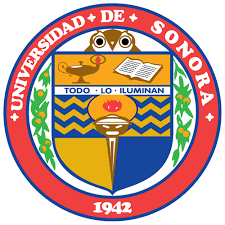



# **Actividad 5**

*Análisis de Series de Tiempo con Pandas*

Iveth Rocio Navarro Lopez



---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


---

**Preliminares**

In [2]:
#Creación de DATA FRAME dela base de datos y uno adicional para trabajar

url= "https://raw.githubusercontent.com/novandromeda-a/Computational-physics/master/Actividad%201/Base%20de%20datos%20climatol%C3%B3gica.txt"

e=["Fecha","Precip","Evap","Tmax","Tmin"] #Encabezados de las columnas en la 
                                          #base de datos

df_weather = pd.read_csv(url, names=e, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=1, engine='python')                                          
#Declaración de DATA FRAME

#print(df_weather.head(10)) 
#print(df_weather.tail(10)) 
#df_weather.shape  
#df_weather.info()

df_weather1=df_weather.copy() #Este data frame será con el que trabajemos
df_weather1.head()

str_Nulo='Nulo'
df_weather2=df_weather1.replace(to_replace=str_Nulo, value=' ', regex=True) 
df_weather2.head()

#Las siguientes lineas son para pasar los datos a numéricos
cols_list=["Precip","Evap","Tmax","Tmin"] #Diccionario para loop for
for cols in cols_list:
  df_weather2[cols]=pd.to_numeric(df_weather2[cols], errors='coerce') 

#df_weather2.info() 

#Las siguientes lienas sirven para un conteo de datos faltantes
#df_weather2.isnull().sum() 

#df_weather2.head()
#df_weather2.tail()

#df_weather2.describe() #Esta línea sirve para el análisis estadístico

#Las siguientes lineas sirven para hacer que Python reconozca el formato de fecha
df_weather3=df_weather2.copy() 
#df_weather3['Fecha'].head() 

df_weather3['Fecha']=pd.to_datetime(df_weather3['Fecha'], dayfirst=True).copy() 
#df_weather3['Fecha'].head()
#df_weather3.dtypes 

df_weather3['Año']=df_weather3['Fecha'].dt.year 
df_weather3['Mes']=df_weather3['Fecha'].dt.month 

#df_weather3.head()
#df_weather3.tail()

df_weather3.info() 

df_weather4=df_weather3.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17602 entries, 0 to 17601
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   17602 non-null  datetime64[ns]
 1   Precip  17568 non-null  float64       
 2   Evap    9008 non-null   float64       
 3   Tmax    16608 non-null  float64       
 4   Tmin    16648 non-null  float64       
 5   Año     17602 non-null  int64         
 6   Mes     17602 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 962.7 KB


---
**Actividad 5.1**



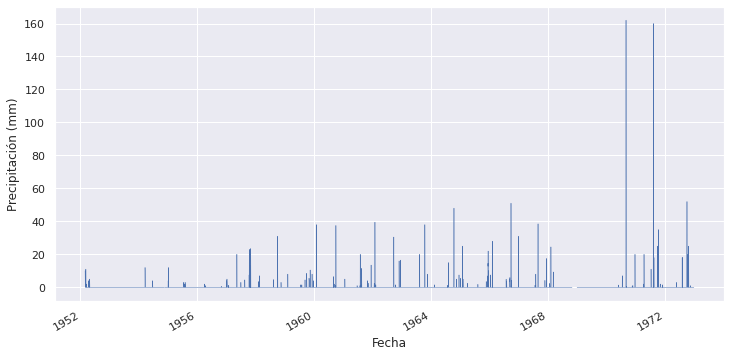

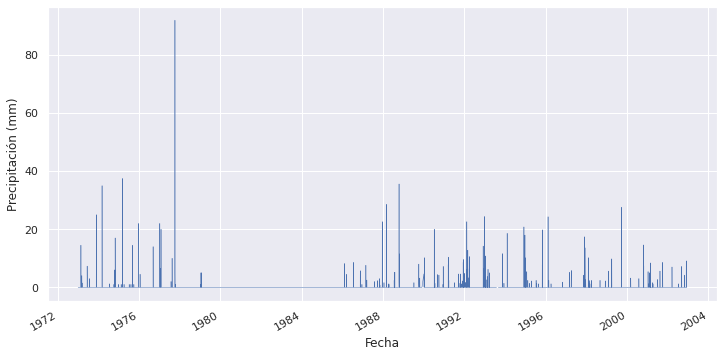

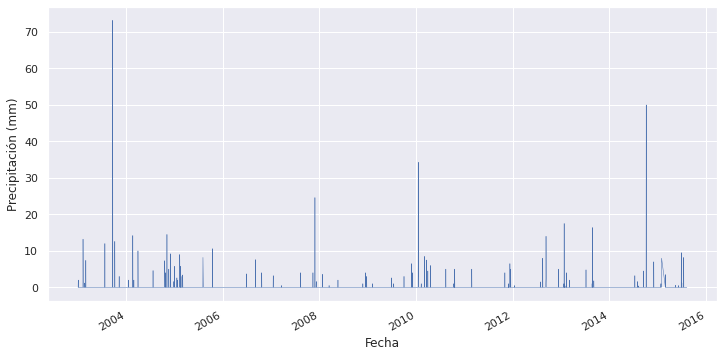

Variación en precipitación promedio 60-30: -0.10739177226651342
Variación en precipitación promedio 90-60: -0.02270303154881917


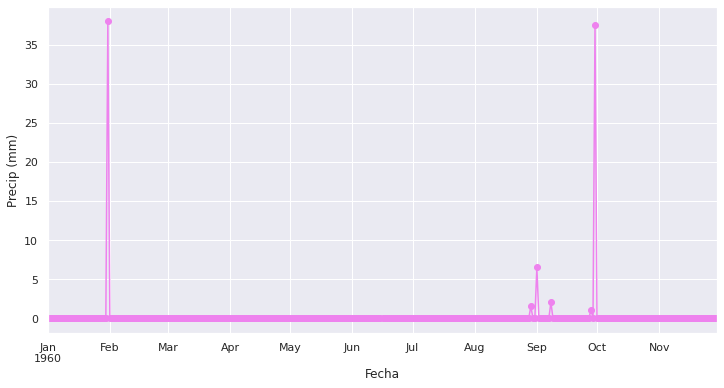

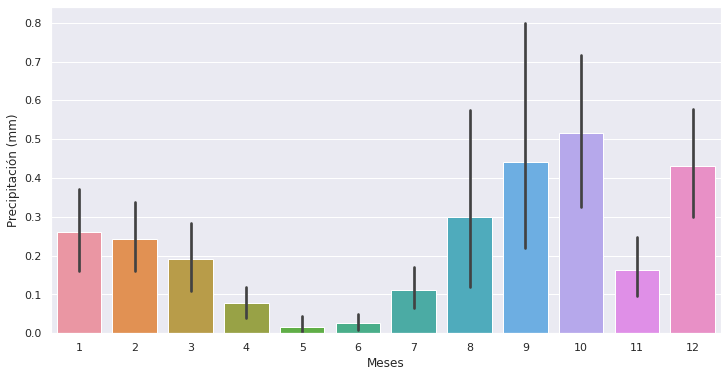

In [18]:
# Esta actividad tiene por propósito la exploración de los datos de Precipitación
# de Puerto Peñasco en los últimos años: 1990- fin de datos.

df_weather5=df_weather4.copy()
df_weather5=df_weather5.set_index('Fecha')

#print(df_weather5.head())

# Periodos de 30 años
df_weather530=df_weather5[(df_weather5['Año'] >= 1952) & (df_weather5['Año'] <= 1972)]
df_weather560=df_weather5[(df_weather5['Año'] > 1972) & (df_weather5['Año'] <= 2002)]
df_weather590=df_weather5[(df_weather5['Año'] > 2002) & (df_weather5['Año'] <= 2015)]
df_weather5a=df_weather5[(df_weather5['Año'] >= 1990) & (df_weather5['Año'] <= 2015)]

#df_weather530.head()

# Gráficas de 30 años

sns.set(rc={'figure.figsize':(12,6)})

pp30=df_weather530.Precip.mean()
pp60=df_weather560.Precip.mean()
pp90=df_weather590.Precip.mean()

grafp30=df_weather530['Precip'].plot(linewidth=0.5)
grafp30.set(ylabel='Precipitación (mm)')
plt.show()

grafp60=df_weather560['Precip'].plot(linewidth=0.5)
grafp60.set(ylabel='Precipitación (mm)')
plt.show()

grafp90=df_weather590['Precip'].plot(linewidth=0.5)
grafp90.set(ylabel='Precipitación (mm)')
plt.show()

print('Variación en precipitación promedio 60-30:', pp60-pp30)
print('Variación en precipitación promedio 90-60:', pp90-pp60)


# Gráficas de precipitación localizadas específicamente

sns.set_style=('darkgrid')

# Para 1960
df_l2001=df_weather5.loc['1960','Precip'].plot(marker='o',linestyle='-',color='violet')
df_l2001.set_ylabel('Precip (mm)')
plt.show()

df_month=sns.barplot(x='Mes',y='Precip',data=df_weather5)
df_month.set(xlabel='Meses',ylabel='Precipitación (mm)')
plt.show()


---
**Actividad 5.2**


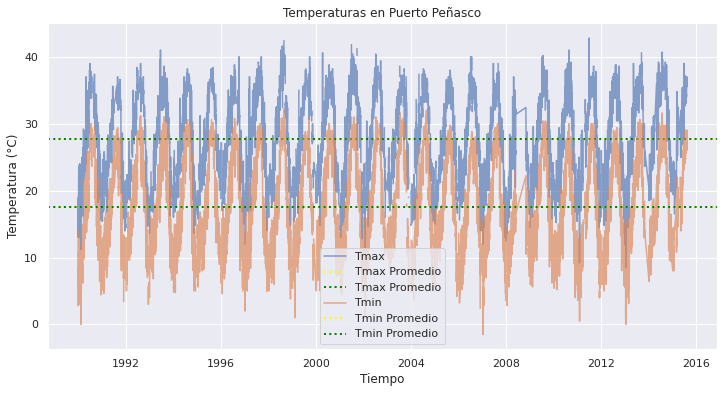

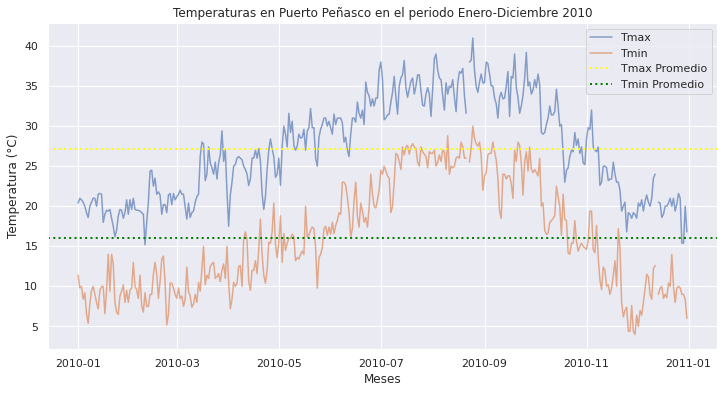

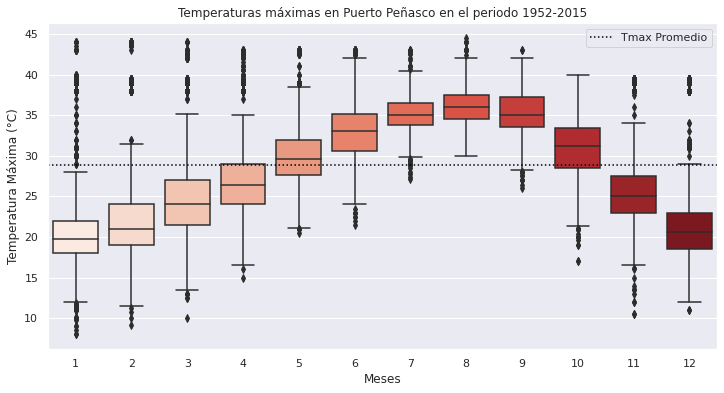

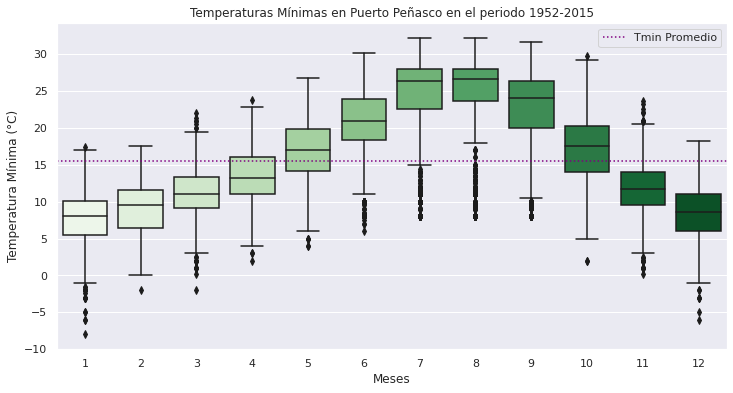

In [4]:
# Este código sirve para  explorar los datos de Temperaturas Máxima y Mínima de
# los últimos 30 años datos a partir de 1990.  Esto tratando de construir dos 
# subgráficas contiguas. 

# Gráfica todo el rango de datos
sns.set_style=('darkgrid')
sns.set(rc={'figure.figsize':(12,6)})

colors=['yellow','green']
cols_grapht=['Tmax','Tmin']

fig, ax=plt.subplots()
for nm in cols_grapht:
  ax.plot(df_weather5a[nm],linestyle='-',alpha=0.65,label=nm)
  for color in colors:
    plt.axhline(df_weather5a[nm].mean(),color=color,linestyle='dotted',linewidth=2,label=nm + ' ' + 'Promedio')
    

ax.legend()
ax.set_ylabel('Temperatura (°C)')
ax.set_xlabel('Tiempo')
ax.set_title('Temperaturas en Puerto Peñasco')

plt.show()

# Análisis de un año específico completo para las dos Temperaturas

sns.set_style=('darkgrid')
sns.set(rc={'figure.figsize':(12,6)})

df_weather2010=df_weather5a.loc['2010-01-01':'2010-12-31']
fig, ax=plt.subplots(sharex=True)
for nm in cols_grapht:
  ax.plot(df_weather2010[nm],linestyle='-',alpha=0.65,label=nm)

plt.axhline(df_weather2010['Tmax'].mean(),color='yellow',linestyle='dotted',linewidth=2,label='Tmax' + ' ' + 'Promedio')
plt.axhline(df_weather2010['Tmin'].mean(),color='green',linestyle='dotted',linewidth=2,label='Tmin' + ' ' + 'Promedio')

ax.legend()
ax.set_ylabel('Temperatura (°C)')
ax.set_xlabel('Meses')
ax.set_title('Temperaturas en Puerto Peñasco en el periodo Enero-Diciembre 2010')


plt.show()

# Gráfica de la estacionalidad filtrando los datos por mes

sns.set_style=('whitegrid')
sns.set(rc={'figure.figsize':(12,6)})

pt2010=sns.boxplot(y=df_weather5['Tmax'],x=df_weather5['Mes'],palette='Reds')

plt.ylabel('Temperatura Máxima (°C)')
plt.xlabel('Meses')
plt.title('Temperaturas máximas en Puerto Peñasco en el periodo 1952-2015')
plt.axhline(y=df_weather5['Tmax'].mean(),linestyle='dotted',color='black',label='Tmax'+' '+'Promedio')
plt.legend()
plt.show()



ptt2010=sns.boxplot(y=df_weather5['Tmin'],x=df_weather5['Mes'],palette='Greens')
plt.axhline(y=df_weather5['Tmin'].mean(),linestyle='dotted',color='purple',label='Tmin'+' '+'Promedio')

#Detalles
plt.legend()
plt.ylabel('Temperatura Mínima (°C)')
plt.xlabel('Meses')
plt.title('Temperaturas Mínimas en Puerto Peñasco en el periodo 1952-2015')


plt.show()

---
**Actividad 5.3**


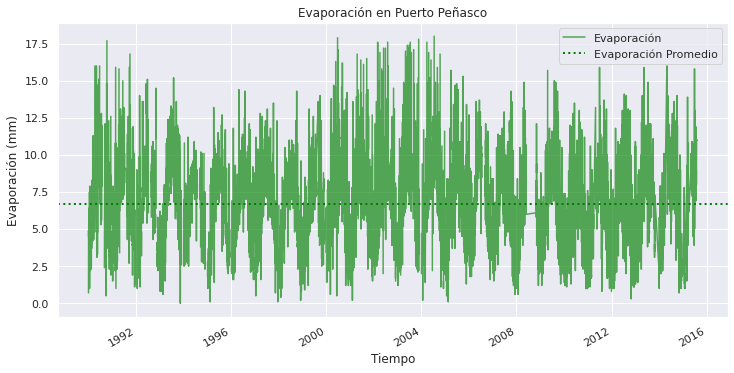

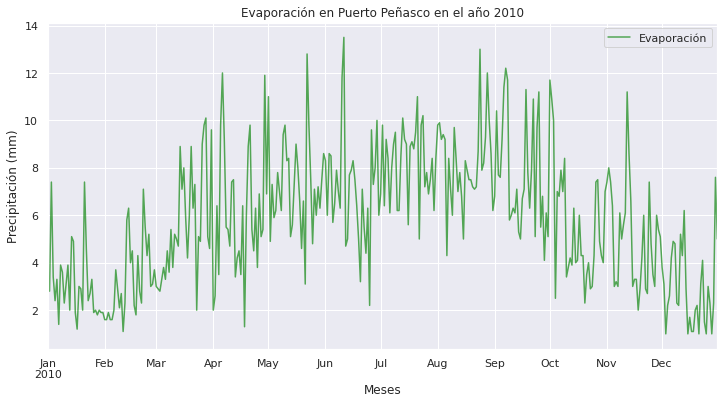

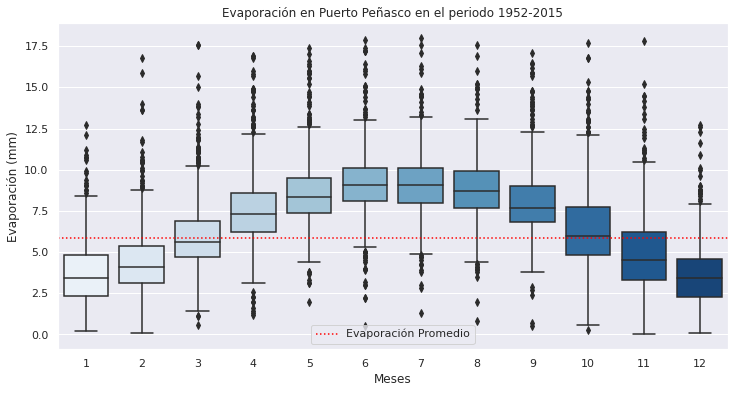

In [5]:
# Este código sirve para rrealizar el mismo análisis que en la Actividad 5.2,
# pero para la variable de Evaporación.

sns.set_style=('darkgrid')
sns.set(rc={'figure.figsize':(12,6)})

df_weathere=df_weather5.loc['1990':'2015','Evap'].plot(marker=None,linestyle='-',color='green',alpha=0.65,label='Evaporación')
plt.axhline(df_weather5a['Evap'].mean(),color=color,linestyle='dotted',linewidth=2,label='Evaporación' + ' ' + 'Promedio')

plt.legend()
plt.ylabel('Evaporación (mm)')
plt.xlabel('Tiempo')
plt.title('Evaporación en Puerto Peñasco')

plt.show()


sns.set_style=('darkgrid')
sns.set(rc={'figure.figsize':(12,6)})

df_weathere2010=df_weather5.loc['2010-01-01':'2010-12-31']
df_weathere2010['Evap'].plot(marker=None,linestyle='-',color='green',alpha=0.65,label='Evaporación')

plt.legend()
plt.title('Evaporación en Puerto Peñasco en el año 2010')
plt.xlabel('Meses')
plt.ylabel('Precipitación (mm)')

plt.show()

sns.set_style=('darkgrid')
sns.set(rc={'figure.figsize':(12,6)})

pe2010=sns.boxplot(y=df_weather5['Evap'],x=df_weather5['Mes'],palette='Blues')

plt.ylabel('Evaporación (mm)')
plt.xlabel('Meses')
plt.title('Evaporación en Puerto Peñasco en el periodo 1952-2015')
plt.axhline(y=df_weather2010['Evap'].mean(),linestyle='dotted',color='red',label='Evaporación'+' '+'Promedio')
plt.legend()
plt.show()

In [6]:
df_weathere20107=df_weathere2010.rolling(7, center=True).mean()
df_weathere201030=df_weathere2010.rolling(30, center=True).mean()
df_weathere1990365=df_weather5a.rolling(365, center=True).mean()

---
**Actividad 5.4**


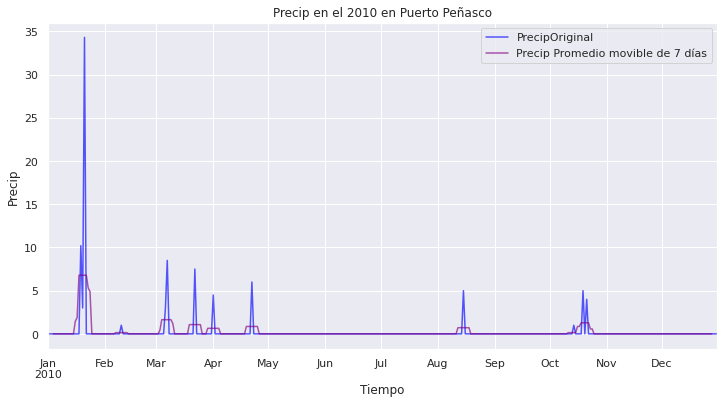

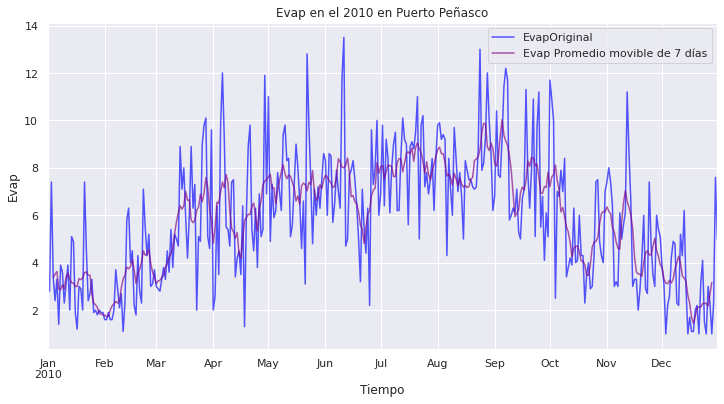

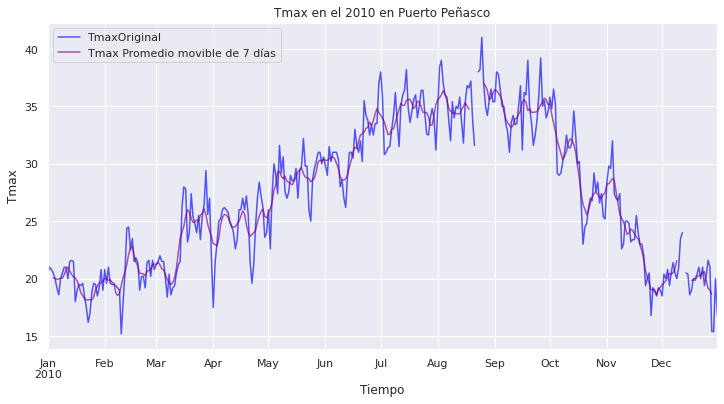

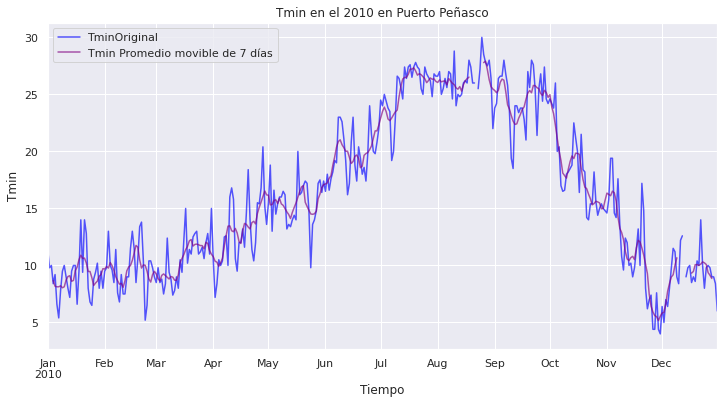

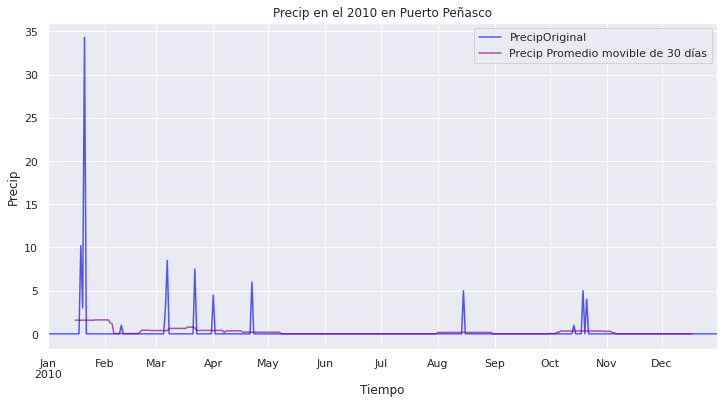

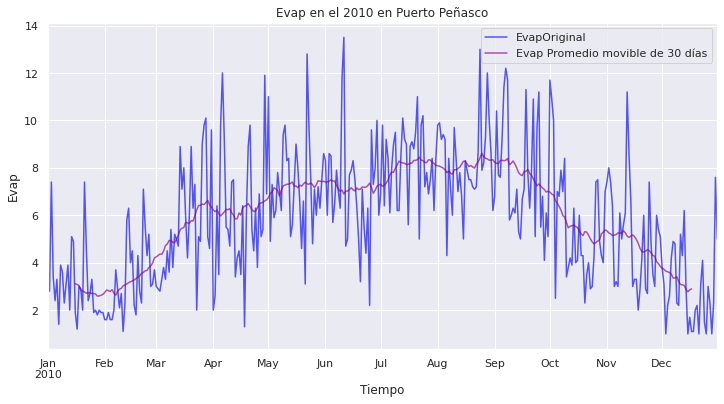

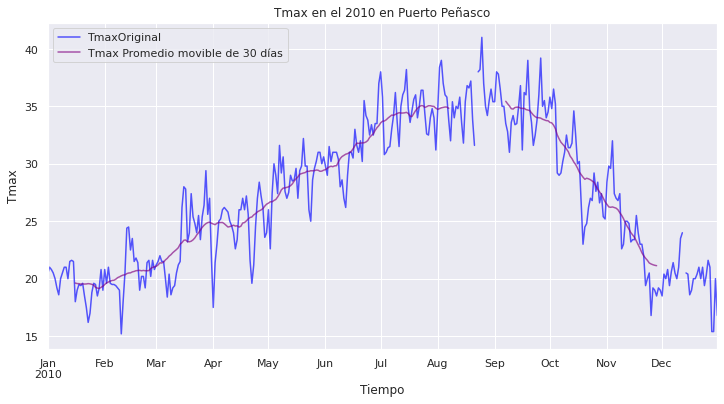

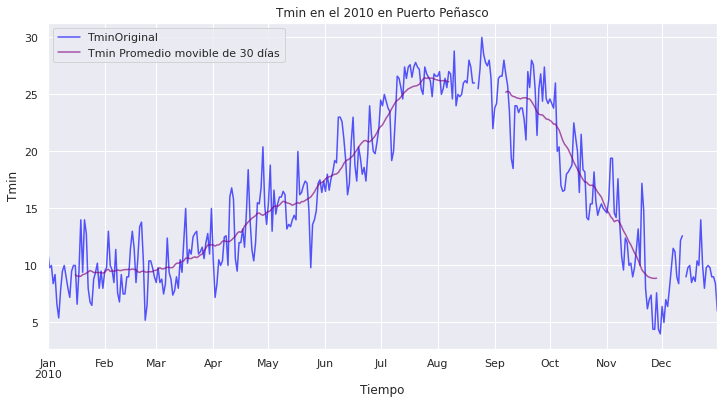

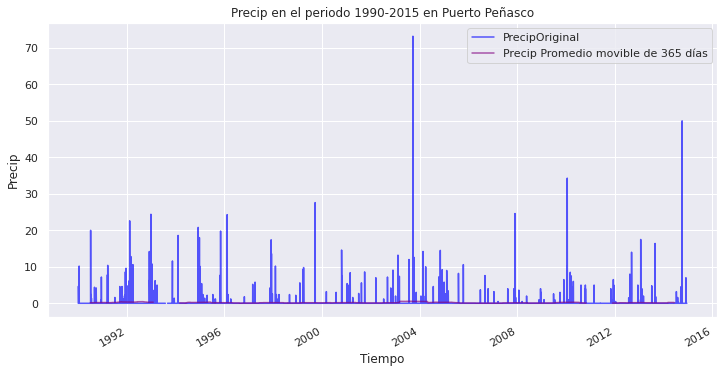

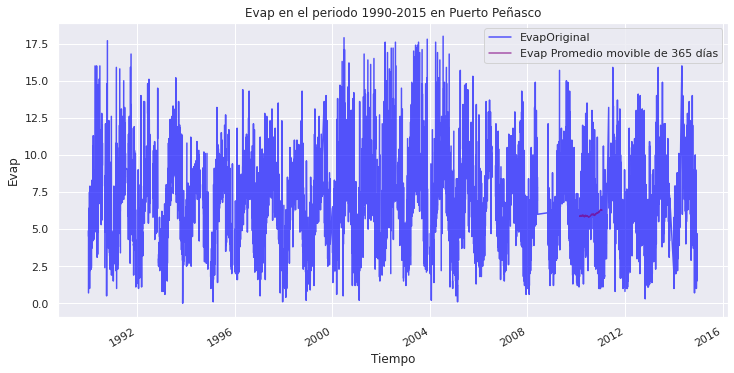

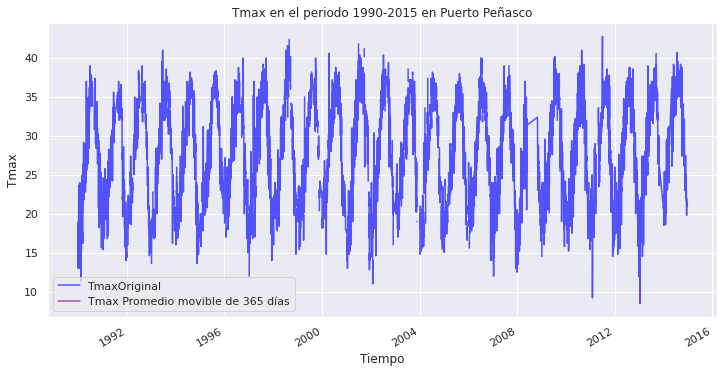

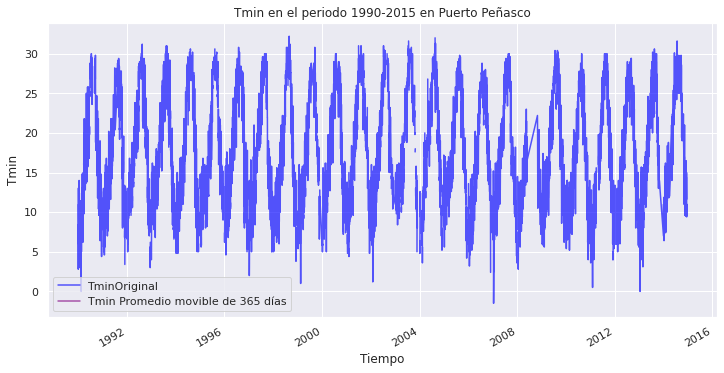

In [18]:
# Este código sirve para crear nuevos DataFrames de las Temperaturas y la 
# Evaporación con promedios móviles de 7, 30 y 365 días.

df_weather5a=df_weather5[(df_weather5['Año'] >= 1990) & (df_weather5['Año'] < 2015)]

df_weathere20107=df_weathere2010.rolling(7, center=True).mean()
df_weathere201030=df_weathere2010.rolling(30, center=True).mean()
df_weathere1990365=df_weather5a.rolling(365, center=True).mean()

lst_prom_mov=['df_weathere19907','df_weathere199030','df_weathere1990365']

# DF con promedio de 7 días:
sns.set_style=('darkgrid')

for nm in cols_plot:
  df_weathere2010[nm].plot(marker=None,linestyle='-',color='blue',alpha=0.65,label=nm + 'Original')
  for pm in cols_plot:
    if (pm!=nm):
      exit()
    else:
      df_weathere20107[pm].plot(marker=None,linestyle='-',color='purple',alpha=0.65,label=pm + ' ' + 'Promedio movible de 7 días')
      plt.xlabel('Tiempo')
      plt.ylabel(nm)
      plt.legend()
      plt.title(nm + ' ' + 'en el 2010 en Puerto Peñasco')
      plt.show()


# DF con promedio de 30 días:
sns.set_style=('darkgrid')

for nm in cols_plot:
  df_weathere2010[nm].plot(marker=None,linestyle='-',color='blue',alpha=0.65,label=nm + 'Original')
  for pm in cols_plot:
    if (pm!=nm):
      exit()
    else:
      df_weathere201030[pm].plot(marker=None,linestyle='-',color='purple',alpha=0.65,label=pm + ' ' + 'Promedio movible de 30 días')
      plt.xlabel('Tiempo')
      plt.ylabel(nm)
      plt.legend()
      plt.title(nm + ' ' + 'en el 2010 en Puerto Peñasco')
      plt.show()


# DF con promedio de 365 días:
sns.set_style=('darkgrid')

for nm in cols_plot:
  df_weather5a[nm].plot(marker=None,linestyle='-',color='blue',alpha=0.65,label=nm + 'Original')
  for pm in cols_plot:
    if (pm!=nm):
      exit()
    else:
      df_weathere1990365[pm].plot(marker=None,linestyle='-',color='purple',alpha=0.65,label=pm + ' ' + 'Promedio movible de 365 días')
      plt.xlabel('Tiempo')
      plt.ylabel(nm)
      plt.legend()
      plt.title(nm + ' ' + 'en el periodo 1990-2015 en Puerto Peñasco')
      plt.show()


---
**Actividad 5.5**


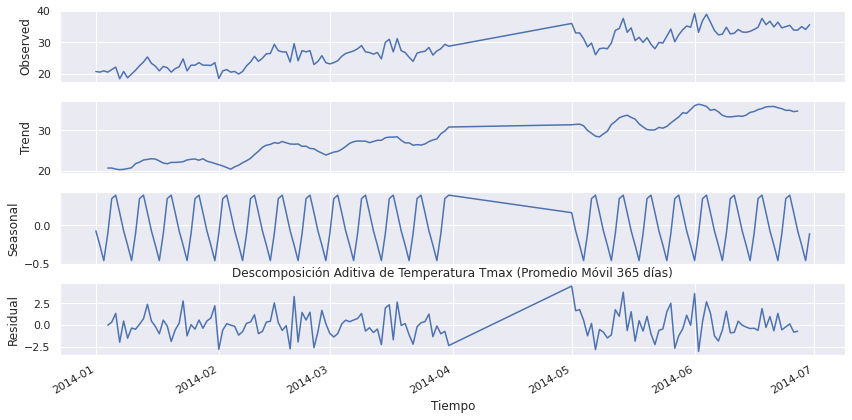

Text(0.5, 41.364745962155595, 'Tiempo')

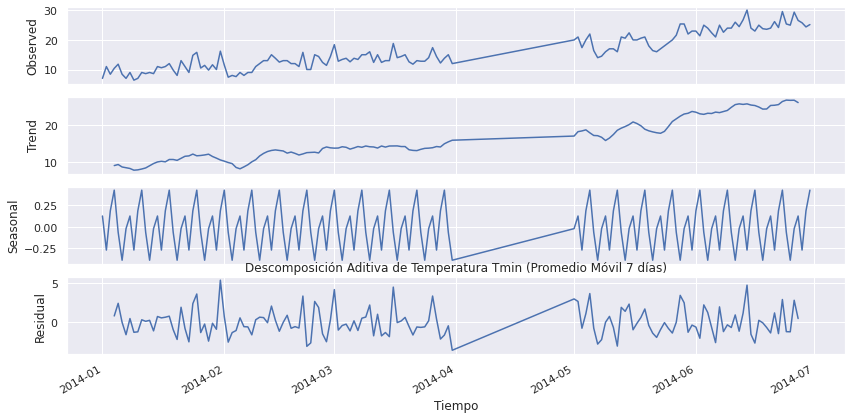

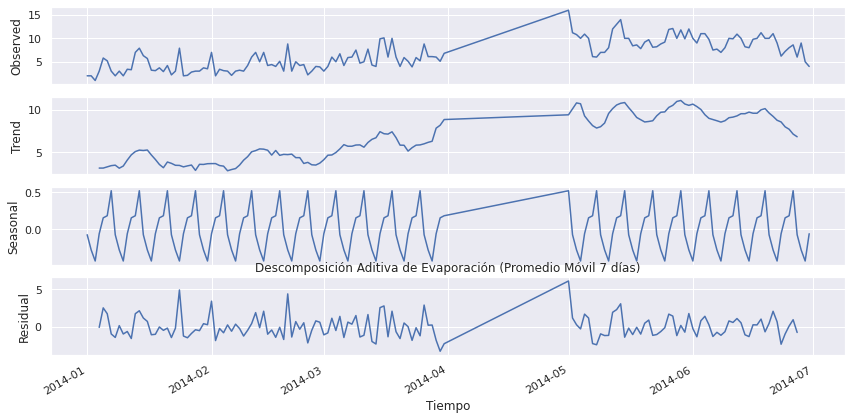

In [8]:
# Este código utiliza la biblioteca statsmodels.tsa de Python, para realizar una
# descomposición de una serie de tiempo.

import statsmodels.api as sm

sns.set_style=('darkgrid')
sns.set(rc={'figure.figsize':(12, 6)})

start, end = '2014-01', '2014-06'

# Frecuencia de 7 días
decompfreq = 7

dct = sm.tsa.seasonal_decompose(df_weather5a.loc[start:end, 'Tmax'].interpolate(),
                                    freq=decompfreq, model='additive')
dct.plot()

plt.title('Descomposición Aditiva de Temperatura Tmax (Promedio Móvil 365 días)');
plt.xlabel('Tiempo')
plt.show()

# Temperatura mínima:
sns.set_style=('darkgrid')
sns.set(rc={'figure.figsize':(12, 6)})

start, end = '2014-01', '2014-06'

# Frecuencia de 7 días
decompfreq = 7

dctm = sm.tsa.seasonal_decompose(df_weather5a.loc[start:end, 'Tmin'].interpolate(),
                                    freq=decompfreq, model='additive')
dctm.plot()

plt.title('Descomposición Aditiva de Temperatura Tmin (Promedio Móvil 7 días)');
plt.xlabel('Tiempo')

# Evaporación:
sns.set_style=('darkgrid')
sns.set(rc={'figure.figsize':(12, 6)})

start, end = '2014-01', '2014-06'

# Frecuencia de 7 días
decompfreq = 7

dctme = sm.tsa.seasonal_decompose(df_weather5a.loc[start:end, 'Evap'].interpolate(),
                                    freq=decompfreq, model='additive')
dctme.plot()

plt.title('Descomposición Aditiva de Evaporación (Promedio Móvil 7 días)');
plt.xlabel('Tiempo')

---
**Actividad 5.6**


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


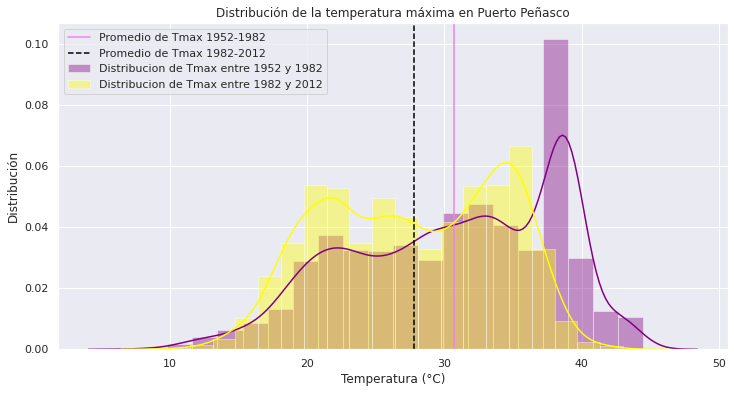

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


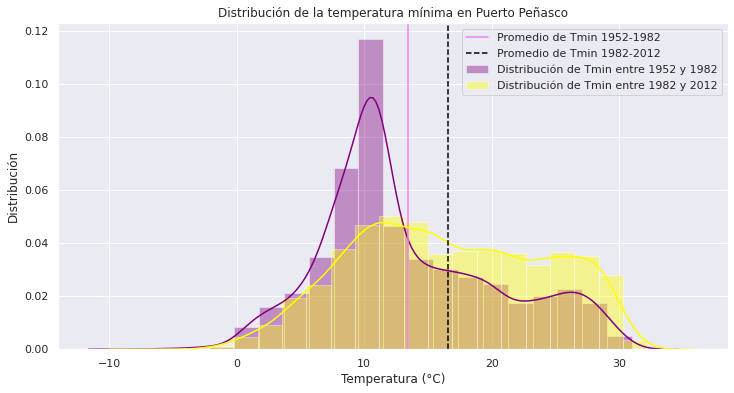

In [17]:
# Este código sirve para explorar visualmente si se observa un cambio en la 
# distribución de Temperaturas (histogramas y kde), sobreponiendo dos histogramas
# de dos periodos de 30 años contiguos.

sns.set_style=('darkgrid')
sns.set(rc={'figure.figsize':(12, 6)})

# Temperatura máxima
weathertmd30=sns.distplot(df_weather530.Tmax,bins=20,kde=True,color='purple',label='Distribucion de Tmax entre 1952 y 1982')
plt.axvline(x=df_weather530.Tmax.mean(),linestyle='-',color='violet',label='Promedio de Tmax 1952-1982')

weathertmd60=sns.distplot(df_weather560.Tmax,bins=20,kde=True,color='yellow',label='Distribucion de Tmax entre 1982 y 2012')
plt.axvline(x=df_weather560.Tmax.mean(),linestyle='--',color='black',label='Promedio de Tmax 1982-2012')

plt.legend()
plt.xlabel('Temperatura (°C)')
plt.ylabel('Distribución')
plt.title('Distribución de la temperatura máxima en Puerto Peñasco')
plt.show()

#Temperatura mínima
sns.set_style=('darkgrid')
sns.set(rc={'figure.figsize':(12, 6)})
 
weathertmdd30=sns.distplot(df_weather530.Tmin,bins=20,kde=True,color='purple',label='Distribución de Tmin entre 1952 y 1982')
plt.axvline(x=df_weather530.Tmin.mean(),linestyle='-',color='violet',label='Promedio de Tmin 1952-1982')

weathertmdd60=sns.distplot(df_weather560.Tmin,bins=20,kde=True,color='yellow',label='Distribución de Tmin entre 1982 y 2012')
plt.axvline(x=df_weather560.Tmin.mean(),linestyle='--',color='black',label='Promedio de Tmin 1982-2012')

plt.legend()
plt.xlabel('Temperatura (°C)')
plt.ylabel('Distribución')
plt.title('Distribución de la temperatura mínima en Puerto Peñasco')
plt.show()